## Importing Libraries

In [35]:
import pandas as pd
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os 
from time import time
from time import sle
import seaborn as sns
import matplotlib.pyplot as plt

## Getting data from CoinMarketCap API

In [8]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [9]:
type(data)

dict

In [10]:
pd.set_option('display.max_columns', None)
pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9997,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.930952e+07,1.930952e+07,NaN,1,NaN,NaN,None,2023-03-06T02:18:00.000Z,22347.490585,1.308763e+10,8.7547,-0.279066,-1.115440,-5.206063,-4.498047,32.702404,30.922224,4.315193e+11,42.3168,4.692973e+11,None,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6519,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-03-06T02:18:00.000Z,1560.699913,4.795733e+09,1.8021,-0.235747,-1.356043,-5.004070,-5.877833,24.444842,23.223409,1.909889e+11,18.7292,1.909889e+11,None,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,48778,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.147947e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-03-06T02:18:00.000Z,1.000144,1.878136e+10,-3.6580,-0.000025,0.001945,0.005636,0.003491,0.033833,0.008529,7.148974e+10,7.0106,7.315228e+10,None,2023-03-06T02:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578941e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-03-06T02:18:00.000Z,286.395839,2.946722e+08,-2.0018,-0.698114,-2.029858,-7.253507,-13.727347,11.184599,-1.370559,4.522022e+10,4.4335,4.581760e+10,None,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,10450,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.399958e+10,4.399958e+10,NaN,5,NaN,NaN,None,2023-03-06T02:18:00.000Z,0.999953,2.350016e+09,2.9907,0.014615,-0.012868,-0.009306,0.006791,0.002293,-0.010057,4.399752e+10,4.3137,4.399752e+10,None,2023-03-06T02:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
5,52,XRP,XRP,xrp,898,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-03-06T02:18:00.000Z,0.363209,5.697965e+08,5.3110,-1.302940,-3.426857,-3.839812,-11.286217,5.263851,-6.121964,1.850583e+10,1.8144,3.632090e+10,None,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN
6,2010,Cardano,ADA,cardano,663,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.468325e+10,3.553818e+10,NaN,7,NaN,NaN,None,2023-03-06T02:18:00.000Z,0.332629,1.719187e+08,-3.5961,-1.335385,-2.824683,-9.603905,-16.978290,24.688691,3.699603,1.153666e+10,1.1313,1.496832e+10,None,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN
7,3890,Polygon,MATIC,polygon,599,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,None,2023-03-06T02:18:00.000Z,1.123756,2.966223e+08,-18.5163,-0.631996,-2.739005,-12.423517,-8.688105,40.111804,22.370273,9.815245e+09,0.9625,1.123756e+10,None,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,650,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,9,NaN,NaN,None,2023-03-06T02:18:00.000Z,0.073866,2.276273e+08,-18.5808,-0.937641,-2.627499,-10.011647,-20.969867,1.344589,-27.952535,9.799794e+09,0.9609,9.799794e+09,None,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN
9,4687,Binance USD,BUSD,binance-

## Adding timestamp to see when the data was first imported 

In [36]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9997,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19309518.00000,19309518.00000,NaN,1,NaN,NaN,None,2023-03-06T02:18:00.000Z,22347.49058,13087625253.22087,8.75470,-0.27907,-1.11544,-5.20606,-4.49805,32.70240,30.92222,431519271698.38031,42.31680,469297302276.83002,None,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:42:39.978944
1,1027,Ethereum,ETH,ethereum,6519,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-06T02:18:00.000Z,1560.69991,4795732824.09552,1.80210,-0.23575,-1.35604,-5.00407,-5.87783,24.44484,23.22341,190988882308.99060,18.72920,190988882308.98999,None,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:42:39.978944
2,825,Tether,USDT,tether,48778,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,71479468181.54347,73141766321.23428,NaN,3,NaN,NaN,None,2023-03-06T02:18:00.000Z,1.00014,18781355597.74159,-3.65800,-0.00003,0.00195,0.00564,0.00349,0.03383,0.00853,71489738707.11385,7.01060,73152275694.07001,None,2023-03-06T02:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-06 02:42:39.978944
3,1839,BNB,BNB,bnb,1206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157894132.94445,159979963.59043,NaN,4,NaN,NaN,None,2023-03-06T02:18:00.000Z,286.39584,294672168.37440,-2.00180,-0.69811,-2.02986,-7.25351,-13.72735,11.18460,-1.37056,45220222675.53002,4.43350,45817595893.37000,None,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:42:39.978944
4,3408,USD Coin,USDC,usd-coin,10450,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43999583778.00385,43999583778.00385,NaN,5,NaN,NaN,None,2023-03-06T02:18:00.000Z,0.99995,2350016129.71288,2.99070,0.01461,-0.01287,-0.00931,0.00679,0.00229,-0.01006,43997521717.81473,4.31370,43997521717.81000,None,2023-03-06T02:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-06 02:42:39.978944
5,52,XRP,XRP,xrp,898,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-06T02:18:00.000Z,0.36321,569796478.23304,5.31100,-1.30294,-3.42686,-3.83981,-11.28622,5.26385,-6.12196,18505830867.22275,1.81440,36320901424.76000,None,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:42:39.978944
6,2010,Cardano,ADA,cardano,663,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34683248482.91000,35538184453.81200,NaN,7,NaN,NaN,None,2023-03-06T02:18:00.000Z,0.33263,171918691.24138,-3.59610,-1.33538,-2.82468,-9.60391,-16.97829,24.68869,3.69960,11536663834.20335,1.13130,14968317422.60000,None,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:42:39.978944
7,3890,Polygon,MATIC,polygon,599,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-03-06T02:18:00.000Z,1.12376,296622274.31508,-18.51630,-0.63200,-2.73901,-12.42352,-8.68811,40.11180,22.37027,9815245332.05133,0.96250,11237564194.14000,None,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:42:39.978944
8

## Putting all the import data code in a program and adding a part to put the data in a CSV

In [12]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


   
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'/Users/kshitijsharawat/Desktop/CryptoAPI.csv'):
        df.to_csv(r'/Users/kshitijsharawat/Desktop/CryptoAPI.csv', header='column_names')
    else:
        df.to_csv(r'/Users/kshitijsharawat/Desktop/CryptoAPI.csv', mode='a', header=False)

## Running the code in a loop once a minute 

In [13]:
for i in range(333):
    api_runner()
    print('API Runner ran successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner ran successfully
API Runner ran successfully
API Runner ran successfully
API Runner ran successfully
API Runner ran successfully


KeyboardInterrupt: 

## Importing the downloaded data to a data frame

In [14]:
df = pd.read_csv(r'/Users/kshitijsharawat/Desktop/CryptoAPI.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9997,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.930952e+07,1.930952e+07,NaN,1,NaN,NaN,NaN,2023-03-06T02:18:00.000Z,22347.490585,1.308763e+10,8.7547,-0.279066,-1.115440,-5.206063,-4.498047,32.702404,30.922224,4.315193e+11,42.3168,4.692973e+11,NaN,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:21:14.870609
1,1,1027,Ethereum,ETH,ethereum,6519,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-03-06T02:18:00.000Z,1560.699913,4.795733e+09,1.8021,-0.235747,-1.356043,-5.004070,-5.877833,24.444842,23.223409,1.909889e+11,18.7292,1.909889e+11,NaN,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:21:14.870609
2,2,825,Tether,USDT,tether,48778,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.147947e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-03-06T02:18:00.000Z,1.000144,1.878136e+10,-3.6580,-0.000025,0.001945,0.005636,0.003491,0.033833,0.008529,7.148974e+10,7.0106,7.315228e+10,NaN,2023-03-06T02:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-06 02:21:14.870609
3,3,1839,BNB,BNB,bnb,1206,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578941e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-03-06T02:18:00.000Z,286.395839,2.946722e+08,-2.0018,-0.698114,-2.029858,-7.253507,-13.727347,11.184599,-1.370559,4.522022e+10,4.4335,4.581760e+10,NaN,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:21:14.870609
4,4,3408,USD Coin,USDC,usd-coin,10450,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.399958e+10,4.399958e+10,NaN,5,NaN,NaN,NaN,2023-03-06T02:18:00.000Z,0.999953,2.350016e+09,2.9907,0.014615,-0.012868,-0.009306,0.006791,0.002293,-0.010057,4.399752e+10,4.3137,4.399752e+10,NaN,2023-03-06T02:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-06 02:21:14.870609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,10,5426,Solana,SOL,solana,437,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,3.821699e+08,5.393127e+08,NaN,11,NaN,NaN,NaN,2023-03-06T02:23:00.000Z,20.754520,2.503361e+08,-14.1287,-0.421407,-2.995724,-10.360300,-15.277038,57.391308,47.979165,7.931753e+09,0.7783,1.119318e+10,NaN,2023-03-06T02:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:26:04.135645
71,11,6636,Polkadot,DOT,polkadot-new,475,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.163172e+09,1.289596e+09,NaN,12,9.048698e+08,5.333616e+09,NaN,2023-03-06T02:23:00.000Z,5.894346,1.753431e+08,-6.1909,-0.692215,-2.053825,-11.901992,-14.627191,27.296638,7.077632,6.856137e+09,0.6723,7.601322e+09,NaN,2023-03-06T02:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:26:04.135645
72,12,2,Litecoin,LTC,litecoin,881,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.0,7.241901e+07,8.400000e+07,NaN,13,NaN,NaN,NaN,2023-03-06T02:23:00.000Z,88.801716,3.271652e+08,-12.9256,-0.880423,-2.953448,-6.913868,-10.903745,17.821045,9.526451,6.430933e+09,0.6308,7.459344e+09,NaN,2023-03-06T02:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03

## Changing the scientific notation for better readability.


In [20]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9997,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19309518.00000,19309518.00000,NaN,1,NaN,NaN,NaN,2023-03-06T02:18:00.000Z,22347.49058,13087625253.22087,8.75470,-0.27907,-1.11544,-5.20606,-4.49805,32.70240,30.92222,431519271698.38031,42.31680,469297302276.83002,NaN,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:21:14.870609
1,1,1027,Ethereum,ETH,ethereum,6519,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-03-06T02:18:00.000Z,1560.69991,4795732824.09552,1.80210,-0.23575,-1.35604,-5.00407,-5.87783,24.44484,23.22341,190988882308.99060,18.72920,190988882308.98999,NaN,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:21:14.870609
2,2,825,Tether,USDT,tether,48778,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,71479468181.54347,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-03-06T02:18:00.000Z,1.00014,18781355597.74159,-3.65800,-0.00003,0.00195,0.00564,0.00349,0.03383,0.00853,71489738707.11385,7.01060,73152275694.07001,NaN,2023-03-06T02:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-06 02:21:14.870609
3,3,1839,BNB,BNB,bnb,1206,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157894132.94445,159979963.59043,NaN,4,NaN,NaN,NaN,2023-03-06T02:18:00.000Z,286.39584,294672168.37440,-2.00180,-0.69811,-2.02986,-7.25351,-13.72735,11.18460,-1.37056,45220222675.53002,4.43350,45817595893.37000,NaN,2023-03-06T02:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:21:14.870609
4,4,3408,USD Coin,USDC,usd-coin,10450,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,43999583778.00385,43999583778.00385,NaN,5,NaN,NaN,NaN,2023-03-06T02:18:00.000Z,0.99995,2350016129.71288,2.99070,0.01461,-0.01287,-0.00931,0.00679,0.00229,-0.01006,43997521717.81473,4.31370,43997521717.81000,NaN,2023-03-06T02:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-06 02:21:14.870609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,10,5426,Solana,SOL,solana,437,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,382169902.21852,539312704.88753,NaN,11,NaN,NaN,NaN,2023-03-06T02:23:00.000Z,20.75452,250336115.41776,-14.12870,-0.42141,-2.99572,-10.36030,-15.27704,57.39131,47.97916,7931752868.80725,0.77830,11193176305.47000,NaN,2023-03-06T02:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:26:04.135645
71,11,6636,Polkadot,DOT,polkadot-new,475,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1163171843.47353,1289595513.77871,NaN,12,904869778.00000,5333615561.59993,NaN,2023-03-06T02:23:00.000Z,5.89435,175343076.44767,-6.19090,-0.69222,-2.05383,-11.90199,-14.62719,27.29664,7.07763,6856137309.47847,0.67230,7601322165.56000,NaN,2023-03-06T02:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-06 02:26:04.135645
72,12,2,Litecoin,LTC,litecoin,881,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.00000,72419014.83792,84000000.00000,NaN,13,NaN,NaN,NaN,2023-03-06T02:23:00.000Z,88.80172,327165183.27801,-12.92560,-0.880

## Looking at the coin trends over time 

In [16]:
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.22858,-1.12897,-5.22903,-4.50995,32.66307,30.97721
Ethereum,-0.14581,-1.37143,-5.05894,-5.90776,24.37236,23.21561
Tether,-0.00052,0.00188,0.00497,0.00179,0.03349,0.00705
BNB,-0.60866,-2.12336,-7.34632,-13.75329,11.03845,-1.40811
USD Coin,0.01484,-0.01635,-0.01556,-0.00026,-0.00083,0.00032
XRP,-1.19594,-3.48401,-3.94149,-11.31866,5.22510,-6.14984
Cardano,-1.13835,-2.88634,-9.68009,-17.00778,24.49104,3.68146
Polygon,-0.45900,-2.75403,-12.55668,-8.64252,39.91490,22.37670
Dogecoin,-0.68070,-2.62283,-10.03699,-20.92201,1.29987,-27.94164


## Converting columns into rows and putting it in a new df

In [17]:
df3 = df2.stack()
df3

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.22858
           quote.USD.percent_change_24h    -1.12897
           quote.USD.percent_change_7d     -5.22903
           quote.USD.percent_change_30d    -4.50995
           quote.USD.percent_change_60d    32.66307
                                             ...   
Shiba Inu  quote.USD.percent_change_24h    -2.78237
           quote.USD.percent_change_7d    -14.69811
           quote.USD.percent_change_30d   -22.27237
           quote.USD.percent_change_60d    30.62515
           quote.USD.percent_change_90d    15.86293
Length: 90, dtype: float64

In [18]:
type(df3)

pandas.core.series.Series

## Converting series to data frame

In [19]:
df4 = df3.to_frame(name='values')
df4

values
name                                            
Bitcoin   quote.USD.percent_change_1h   -0.22858
          quote.USD.percent_change_24h  -1.12897
          quote.USD.percent_change_7d   -5.22903
          quote.USD.percent_change_30d  -4.50995
          quote.USD.percent_change_60d  32.66307
...                                          ...
Shiba Inu quote.USD.percent_change_24h  -2.78237
          quote.USD.percent_change_7d  -14.69811
          quote.USD.percent_change_30d -22.27237
          quote.USD.percent_change_60d  30.62515
          quote.USD.percent_change_90d  15.86293

[90 rows x 1 columns]

## Setting the index of the dataframe and using the reset_index() function to create a new index beacuse the df has only has the index and values.

In [21]:
index = pd.Index(range(90))


df5 = df4.set_index(index)
df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.22858
1,Bitcoin,quote.USD.percent_change_24h,-1.12897
2,Bitcoin,quote.USD.percent_change_7d,-5.22903
3,Bitcoin,quote.USD.percent_change_30d,-4.50995
4,Bitcoin,quote.USD.percent_change_60d,32.66307
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,-2.78237
86,Shiba Inu,quote.USD.percent_change_7d,-14.69811
87,Shiba Inu,quote.USD.percent_change_30d,-22.27237
88,Shiba Inu,quote.USD.percent_change_60d,30.62515


### Changing the column name

In [22]:
df6 = df5.rename(columns={'level_1': 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.22858
1,Bitcoin,quote.USD.percent_change_24h,-1.12897
2,Bitcoin,quote.USD.percent_change_7d,-5.22903
3,Bitcoin,quote.USD.percent_change_30d,-4.50995
4,Bitcoin,quote.USD.percent_change_60d,32.66307
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,-2.78237
86,Shiba Inu,quote.USD.percent_change_7d,-14.69811
87,Shiba Inu,quote.USD.percent_change_30d,-22.27237
88,Shiba Inu,quote.USD.percent_change_60d,30.62515


## Replacing the values in percent_change column for better readability 

In [23]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,-0.22858
1,Bitcoin,24h,-1.12897
2,Bitcoin,7d,-5.22903
3,Bitcoin,30d,-4.50995
4,Bitcoin,60d,32.66307
...,...,...,...
85,Shiba Inu,24h,-2.78237
86,Shiba Inu,7d,-14.69811
87,Shiba Inu,30d,-22.27237
88,Shiba Inu,60d,30.62515


## Visually comparing the price changes of different cryptocurrencies over time.

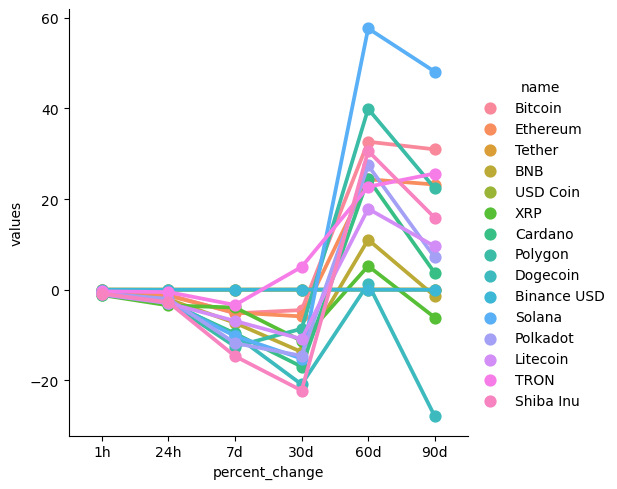

In [25]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')

In [26]:
df_eth = df[['name','quote.USD.price','timestamp']]
df_eth = df_eth.query("name == 'Ethereum'")
df_eth

,name,quote.USD.price,timestamp
1,Ethereum,1560.69991,2023-03-06 02:21:14.870609
16,Ethereum,1559.96834,2023-03-06 02:22:15.066110
31,Ethereum,1560.03774,2023-03-06 02:23:15.263174
46,Ethereum,1559.57651,2023-03-06 02:24:15.465277
61,Ethereum,1559.13148,2023-03-06 02:26:04.135645


## The plot represents the variation in the price of Ethereum (ETH) cryptocurrency over time

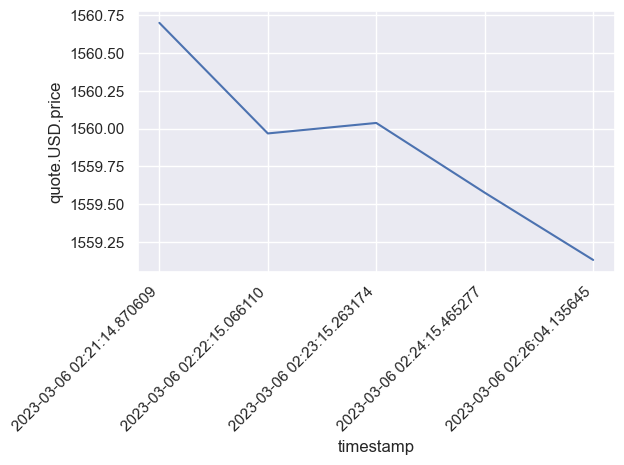

In [33]:
sns.set_theme(style="darkgrid")
ax = sns.lineplot(x='timestamp', y='quote.USD.price', data=df_eth)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()